In [1]:
from planetengine import utilities
from planetengine import frame
from modelscripts import MS98X_systemscript as systemscript
from modelscripts import MS98X_observerscript as observerscript
from modelscripts import sinudoublephase_initialscript as initialscript

model1 = frame.Frame(
    systemscript.build(
        res = 16,
        Ra = 1e4,
        tau = 1e9,
        creep_sR = 30.,
        aspect = 1.,
        ),
    observerscript.build(),
    initialscript.build(
        freq = 1.,
        cont_centre = 0.5,
        cont_width = 0.3,
        ),
    outputPath = 'data/tests',
    instanceID = 'loadtest1',
    )

In [2]:
model2 = frame.Frame(
    systemscript.build(
        res = 32,
        Ra = 1e4,
        tau = 1e9,
        creep_sR = 30.,
        aspect = 2.,
        ),
    observerscript.build(),
    initialscript.build(
        freq = 2.,
        cont_centre = 0.5,
        cont_width = 1.,
        ),
    outputPath = 'data/tests',
    instanceID = 'loadtest2',
    )

avTemp 0.56
avVisc 1.1E+01
modeltime 0.0E+00
Nu 0.9
step 0
surfVRMS 3.02
VRMS 4.40
yielding 0%
fig



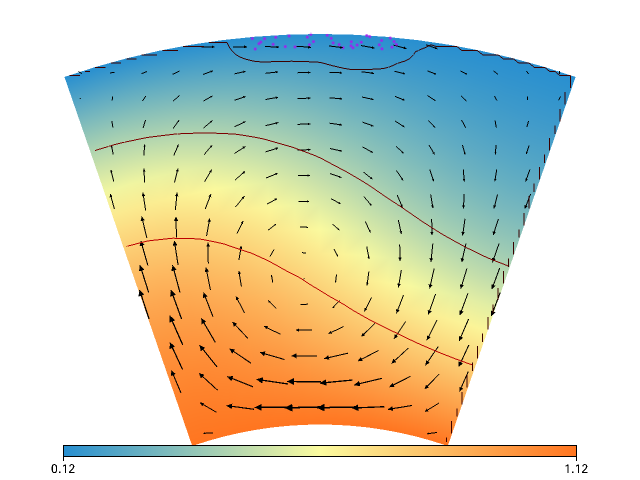

In [3]:
model1.report()

avTemp 0.56
avVisc 1.4E+01
modeltime 0.0E+00
Nu 0.9
step 0
surfVRMS 1.87
VRMS 3.99
yielding 0%
fig



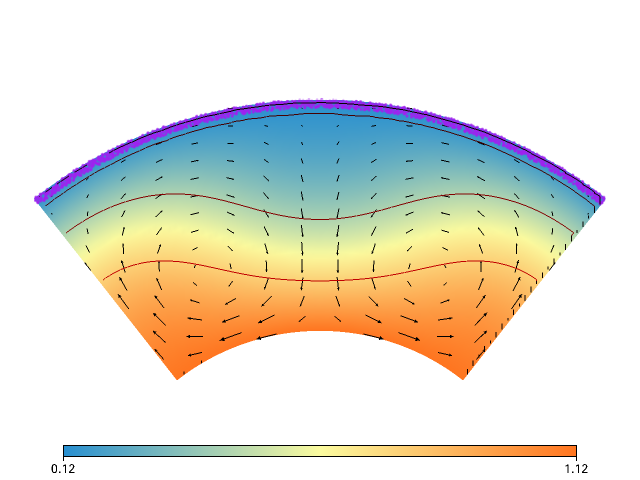

In [4]:
model2.report()

In [5]:
mesh1 = model1.system.mesh
mesh2 = model2.system.mesh
TField1 = model1.system.temperatureField
TField2 = model2.system.temperatureField

In [6]:
from planetengine import mapping
from planetengine.utilities import quickShow
import underworld as uw

In [7]:
TField1.data[:] = TField2.evaluate(mapping.unbox(mesh2, mapping.box(mesh1)))

avTemp 0.56
avVisc 1.1E+01
modeltime 0.0E+00
Nu 0.9
step 0
surfVRMS 3.02
VRMS 4.40
yielding 0%
fig



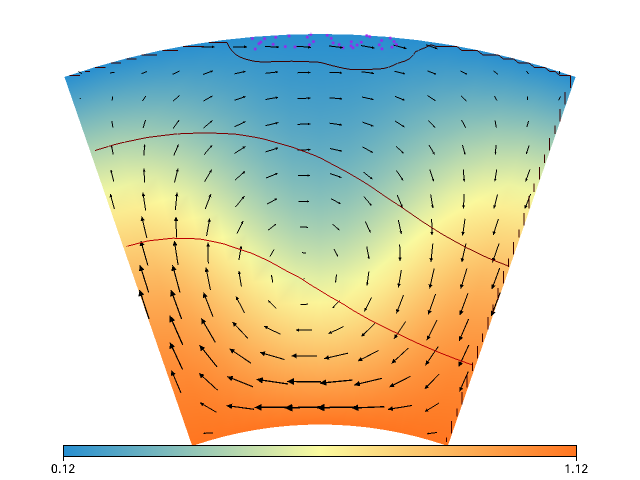

In [8]:
model1.report()

In [9]:
model1.reset()

In [10]:
TField2.data[:] = TField1.evaluate(mapping.unbox(mesh1, mapping.box(mesh2, boxDims = ((0.001, 0.999), (0.001, 0.999)))))

avTemp 0.56
avVisc 1.4E+01
modeltime 0.0E+00
Nu 0.9
step 0
surfVRMS 1.87
VRMS 3.99
yielding 0%
fig



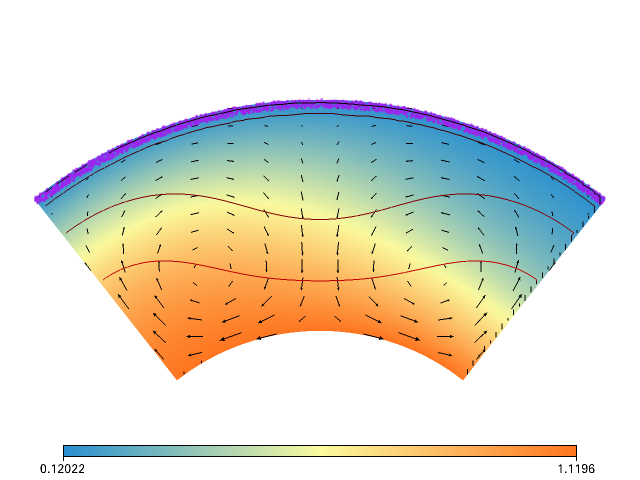

In [11]:
model2.report()

In [12]:
mat1 = model1.system.materialVar
mat2 = model2.system.materialVar
swarm2 = model2.system.swarm

In [13]:
mat1Proj = uw.mesh.MeshVariable(mesh1, 1)
mat1Projector = uw.utils.MeshVariable_Projection(
    mat1Proj,
    mat1
    )
mat1Projector.solve()

In [14]:
mat2.data[:] = mat1Proj.evaluate(
    mapping.unbox(
        mesh1,
        mapping.box(mesh2, swarm2.particleCoordinates.data, boxDims = ((0.001, 0.999), (0.001, 0.999))))) > 0.01

avTemp 0.56
avVisc 1.4E+01
modeltime 0.0E+00
Nu 0.9
step 0
surfVRMS 1.87
VRMS 3.99
yielding 0%
fig



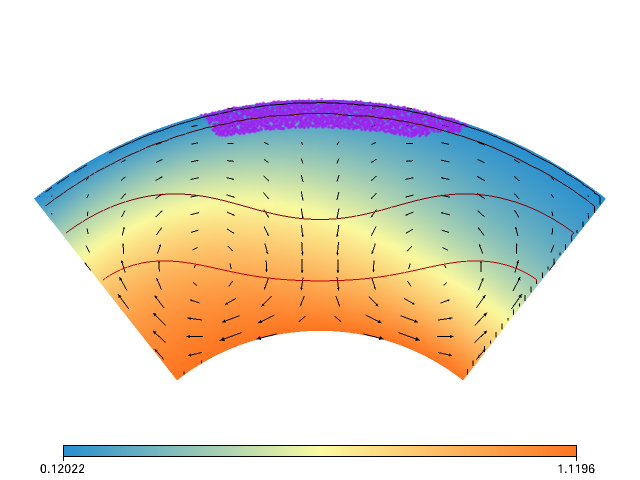

In [15]:
model2.report()